In [ ]:
img = cv2.imread('./test_data/Tom Cruise3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img.shape

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
plt.imshow(img.astype('uint8'))

In [49]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [50]:
faces = face_cascade.detectMultiScale(img)
print(faces)

[[ 43  50 126 126]]


In [51]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(43), np.int32(50), np.int32(126), np.int32(126))

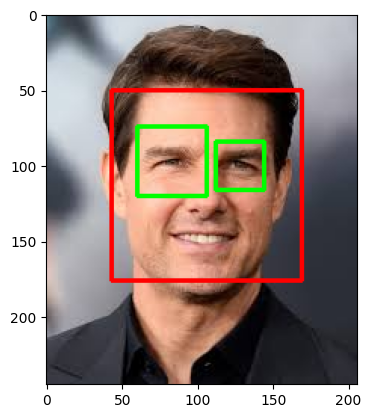

In [52]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_rect = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_color = face_rect[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_rect)
plt.show()

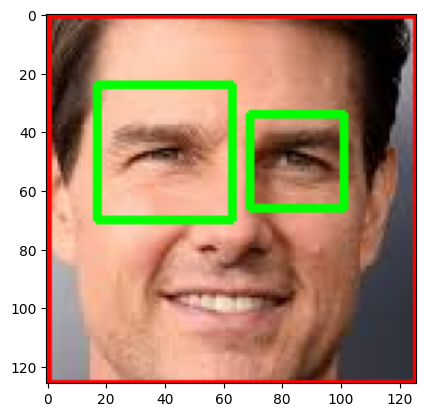

In [53]:
plt.imshow(roi_color)

In [54]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not found or invalid: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [55]:
data_path = "./data/"
cropped_data_path = data_path + "/cropped_data/"

In [56]:
import os
img_dirs = []
for dir in os.scandir(data_path):
    if dir.is_dir():
        img_dirs.append(dir.path)
img_dirs

['./data/Barack Obama',
 './data/Charles Chaplin',
 './data/Cristiano Ronaldo',
 './data/cropped_data',
 './data/Emma Watson',
 './data/Johnny Depp',
 './data/Leonardo DiCaprio',
 './data/Lionel Messi',
 './data/Taylor Swift',
 './data/Tom Cruise',
 './data/Vladimir Putin']

In [57]:
import shutil
if os.path.exists(cropped_data_path):
    shutil.rmtree(cropped_data_path)
os.mkdir(cropped_data_path)

In [58]:

cropped_img_dirs = []
celebrity_filename_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("/")[-1]
    celebrity_filename_dict[celebrity_name] = []

    for file in os.scandir(img_dir):
        roi_color = get_cropped_image(file.path)
        if roi_color is not None:
            cropped_folder  = cropped_data_path + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("creating cropped image in : ", cropped_folder)

            cropped_fle_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_fle_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_filename_dict[celebrity_name].append(cropped_file_path)
            count+=1







creating cropped image in :  ./data//cropped_data/Barack Obama
creating cropped image in :  ./data//cropped_data/Charles Chaplin
creating cropped image in :  ./data//cropped_data/Cristiano Ronaldo
Image not found or invalid: ./data/cropped_data\Barack Obama
Image not found or invalid: ./data/cropped_data\Charles Chaplin
Image not found or invalid: ./data/cropped_data\Cristiano Ronaldo
creating cropped image in :  ./data//cropped_data/Emma Watson
creating cropped image in :  ./data//cropped_data/Johnny Depp
creating cropped image in :  ./data//cropped_data/Leonardo DiCaprio
creating cropped image in :  ./data//cropped_data/Lionel Messi
creating cropped image in :  ./data//cropped_data/Taylor Swift
creating cropped image in :  ./data//cropped_data/Tom Cruise
creating cropped image in :  ./data//cropped_data/Vladimir Putin
Image not found or invalid: ./data/Vladimir Putin\Владимир_Путин_(08-03-2024)_(cropped)_(higher_res).jpg


In [59]:
celebrity_filename_dict

{'Barack Obama': ['./data//cropped_data/Barack Obama/Barack Obama1.png',
  './data//cropped_data/Barack Obama/Barack Obama2.png',
  './data//cropped_data/Barack Obama/Barack Obama3.png',
  './data//cropped_data/Barack Obama/Barack Obama4.png',
  './data//cropped_data/Barack Obama/Barack Obama5.png',
  './data//cropped_data/Barack Obama/Barack Obama6.png',
  './data//cropped_data/Barack Obama/Barack Obama7.png',
  './data//cropped_data/Barack Obama/Barack Obama8.png',
  './data//cropped_data/Barack Obama/Barack Obama9.png',
  './data//cropped_data/Barack Obama/Barack Obama10.png',
  './data//cropped_data/Barack Obama/Barack Obama11.png',
  './data//cropped_data/Barack Obama/Barack Obama12.png',
  './data//cropped_data/Barack Obama/Barack Obama13.png',
  './data//cropped_data/Barack Obama/Barack Obama14.png',
  './data//cropped_data/Barack Obama/Barack Obama15.png',
  './data//cropped_data/Barack Obama/Barack Obama16.png',
  './data//cropped_data/Barack Obama/Barack Obama17.png',
  './da

In [60]:
#Wavelet Transform


import numpy as np
import pywt
import cv2

def wavelet_transform(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [64]:
class_dict = {}
count = 0
for celebrity_name in celebrity_filename_dict.keys():
    if celebrity_name != 'cropped_data':
        class_dict[celebrity_name] = count
        count += 1
class_dict

{'Barack Obama': 0,
 'Charles Chaplin': 1,
 'Cristiano Ronaldo': 2,
 'Emma Watson': 3,
 'Johnny Depp': 4,
 'Leonardo DiCaprio': 5,
 'Lionel Messi': 6,
 'Taylor Swift': 7,
 'Tom Cruise': 8,
 'Vladimir Putin': 9}

In [65]:
x = []
y = []
for celebrity_name, training_fles in celebrity_filename_dict.items():
    for training_image in training_fles:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = wavelet_transform(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        combined_image = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
        x.append(combined_image)
        y.append(class_dict[celebrity_name])


In [66]:
len(x[0])

4096

In [69]:
len(y)

383

In [70]:
len(x[1])

4096

In [71]:
X = np.array(x).reshape(len(x),len(x[0])).astype(float)
X.shape

(383, 4096)

In [72]:
x[0]

array([[104],
       [146],
       [192],
       ...,
       [ 19],
       [ 19],
       [ 16]], dtype=uint8)

Training Model

Support Vector machine Classifier

In [77]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6979166666666666

In [79]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       1.00      0.67      0.80         6
           2       0.88      0.58      0.70        12
           3       0.50      0.93      0.65        15
           4       1.00      0.67      0.80         6
           5       0.73      0.50      0.59        16
           6       0.80      0.80      0.80         5
           7       1.00      0.73      0.84        11
           8       0.40      0.80      0.53         5
           9       0.67      0.80      0.73        10

    accuracy                           0.70        96
   macro avg       0.80      0.71      0.72        96
weighted avg       0.78      0.70      0.71        96



In [81]:
len(X_test)

96

In [83]:
len(X_train)

287

In [84]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [85]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [86]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Abdul_Alim\Desktop\FaceDetectionApp\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\Abdul_Alim\Desktop\FaceDetectionApp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Abdul_Alim\Desktop\FaceDetectionApp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Abdul_Alim\Desktop\FaceDetectionApp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be r

,model,best_score,best_params
0,svm,0.752571,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.568300,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.752632,{'logisticregression__C': 1}


In [87]:

best_estimators['svm'].score(X_test,y_test)

0.7708333333333334

In [88]:

best_estimators['random_forest'].score(X_test,y_test)

0.53125

In [89]:

best_estimators['logistic_regression'].score(X_test,y_test)

0.78125

In [90]:
best_clf = best_estimators['svm']

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  2,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  9,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  1,  9,  1,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  4,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0,  8]])

Text(95.72222222222221, 0.5, 'Truth')

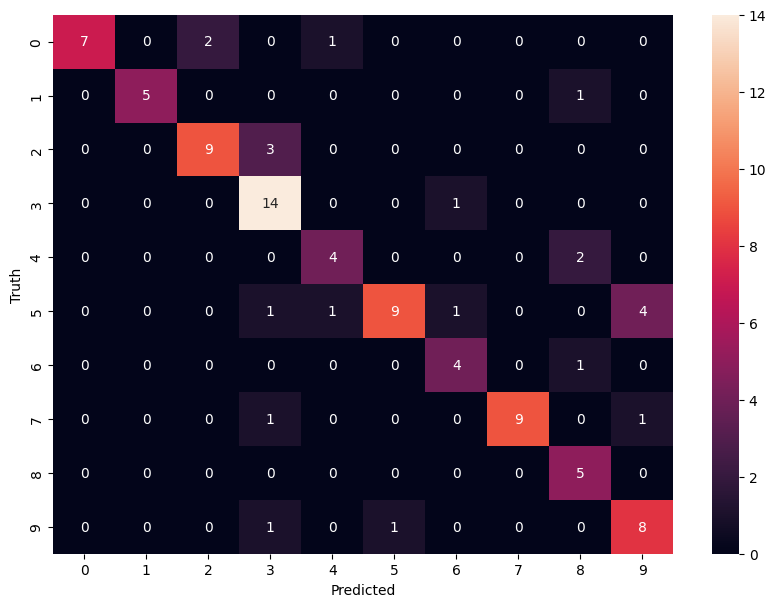

In [92]:
#Confusion Matrix

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
!pip install joblib

In [95]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [98]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))